# plot

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import greatpy as great 
import matplotlib.pyplot as plt 

import seaborn as sns 
import pandas as pd 

In [5]:
test = "../data/tests/test_data/input/01_random.bed"
regdom = "../data/human/hg38/regulatory_domain.bed"

## Count plot

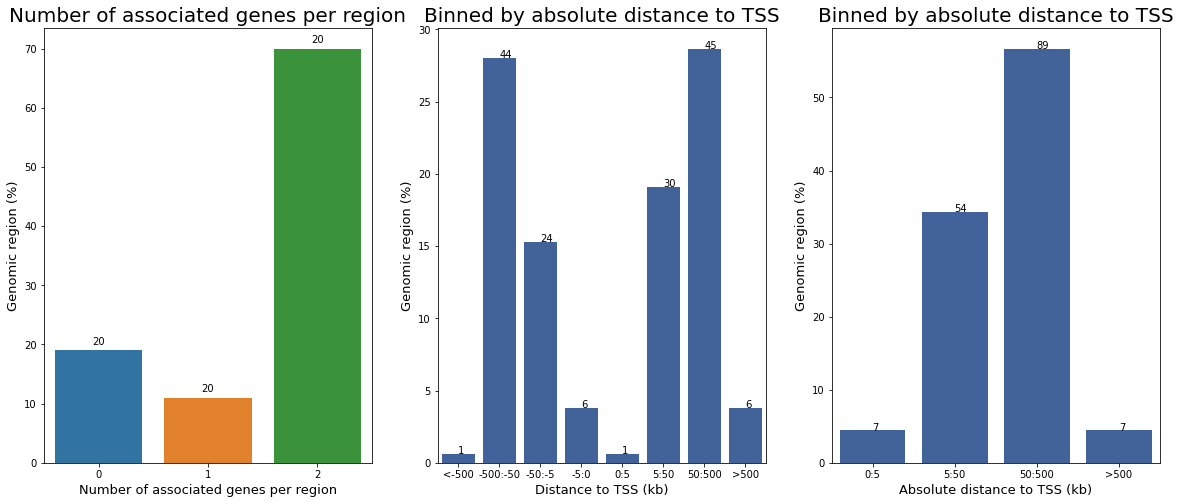

In [6]:
fig,ax = plt.subplots(1,3,figsize=(20,8))
great.pl.graph_nb_asso_per_peaks(test,regdom,ax[0])
great.pl.graph_dist_tss(test,regdom,ax[1])
great.pl.graph_absolute_dist_tss(test,regdom,ax[2])
plt.show()

## Dotplot

In [7]:
enrichment = great.tl.GREAT.enrichment(
    test,
    regdom,
    "../data/human/hg38/chr_size.bed", 
    "../data/human/ontologies.csv"
)

In [8]:
enrichment

,go_term,binom_p_value,binom_fold_enrichment,hypergeom_p_value,hypergeometric_fold_enrichment,intersection_size,recall
GO:0045887,positive regulation of synaptic growth at neur...,5.20389e-13,2.18004e+05,3.08889e-03,3.23741e+02,4,4.00000e+00
GO:0044721,"protein import into peroxisome matrix, substra...",4.84198e-10,3.94065e+04,3.08889e-03,3.23741e+02,4,4.00000e+00
GO:0036250,peroxisome transport along microtubule,4.84198e-10,3.94065e+04,3.08889e-03,3.23741e+02,4,4.00000e+00
GO:0016561,"protein import into peroxisome matrix, translo...",6.31855e-10,3.68645e+04,6.16839e-03,1.61871e+02,4,2.00000e+00
GO:0030576,Cajal body organization,1.49190e-09,2.97236e+04,1.83932e-02,5.39569e+01,4,6.66667e-01
...,...,...,...,...,...,...,...
GO:0006355,"regulation of transcription, DNA-templated",9.93956e-01,2.08617e+01,8.40449e-01,5.54352e-01,1,1.71233e-03
GO:0006915,apoptotic process,9.95014e-01,2.01230e+01,5.39651e-01,1.11443e+00,1,1.72117e-03
GO:0042803,protein homodimerization activity,9.98551e-01,2.44788e+01,9.54394e-01,3.33067e-01,2,2.05761e-03
GO:0005737,cytoplasm,9.98903e-01,6.55886e+01,9.92060e-01,5.70469e-01,24,4.22907e-03


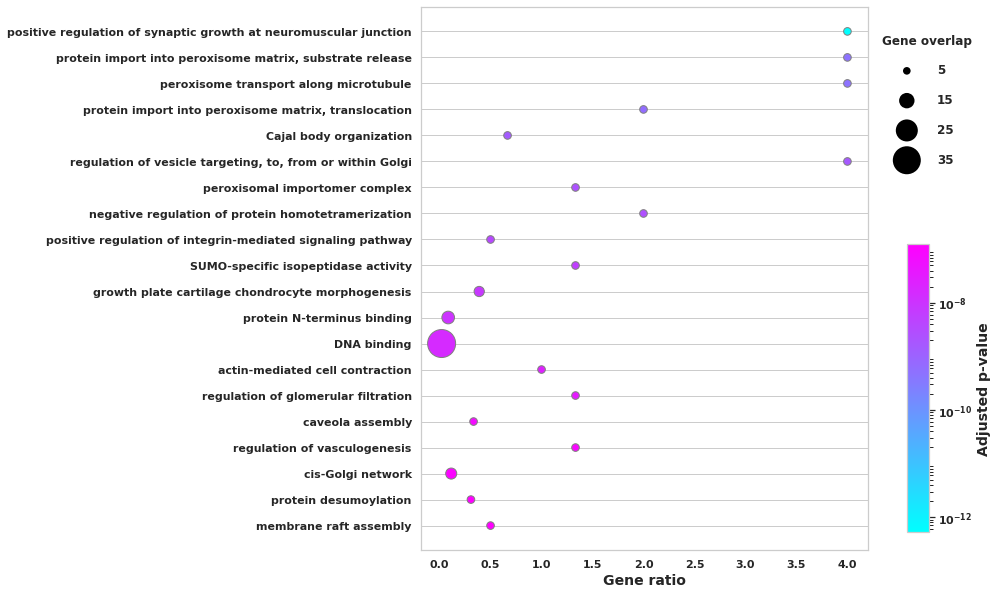

In [9]:
plot = enrichment.rename(columns={"binom_p_value" : "p_value", "go_term":"name"})
plt.figure(figsize=(10,10))
great.pl.plot_enrich(plot)

In [20]:
import matplotlib
def get_specific_color_gradient(colormap,inputList,**kwargs):
    vmin = kwargs.get('vmin','blaq')
    vmax = kwargs.get('vmax','blaq')
    cm = plt.get_cmap(colormap)
    if vmin=='blaq' or vmax=='blaq':
        if type(inputList)==list:
            cNorm = matplotlib.colors.Normalize(vmin=min(inputList), vmax=max(inputList))
        else:
            cNorm = matplotlib.colors.Normalize(vmin=inputList.min(), vmax=inputList.max())
    else:
        cNorm = matplotlib.colors.Normalize(vmin=vmin, vmax = vmax)
    scalarMap = matplotlib.cm.ScalarMappable(norm=cNorm, cmap=cm)
    scalarMap.set_array(inputList)
    colorList=scalarMap.to_rgba(inputList)
    return scalarMap,colorList
get_specific_color_gradient('RdBu',enrichment['binom_p_value'])

(<matplotlib.cm.ScalarMappable at 0x7fb5412916d0>,
 array([[0.40392157, 0.        , 0.12156863, 1.        ],
        [0.40392157, 0.        , 0.12156863, 1.        ],
        [0.40392157, 0.        , 0.12156863, 1.        ],
        ...,
        [0.01960784, 0.18823529, 0.38039216, 1.        ],
        [0.01960784, 0.18823529, 0.38039216, 1.        ],
        [0.01960784, 0.18823529, 0.38039216, 1.        ]]))

In [21]:
enrichment
great.pl.make_bubble_heatmap(order_frame,dictsize)

TypeError: Image data of dtype object cannot be converted to float